# Sales Analysis

#### Import libraries

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

#### Reading our data and concatenate it

In [152]:
for file in os.listdir('E:\Work\Git hub\Sales analysis\Data'):
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [153]:
path='E:\Work\Git hub\Sales analysis\Data'
sales_2019=pd.DataFrame()
for file in os.listdir(path):
    df=pd.read_csv(path+"/"+file)
    sales_2019=pd.concat([sales_2019,df])

In [154]:
sales_2019.head(5) 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data cleansing 

In [155]:
print(sales_2019.shape)
print("---------------------")
print(sales_2019.info())

(186850, 6)
---------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB
None


In [156]:
#Number of null values at each column
sales_2019.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [157]:
#Dropping null values
sales_2019.dropna(inplace=True)

In [158]:
#Check again
sales_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [159]:
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [160]:
#Number of duplicated rows
sales_2019.duplicated().sum()

618

In [161]:
#Drop the duplicated rows
sales_2019.drop_duplicates(inplace=True)

In [162]:
#CHECK
sales_2019.duplicated().sum()

0

In [163]:
#Number of duplicated rows at order Id column
sales_2019['Order ID'].duplicated().sum()

7249

In [166]:
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## EDA

#### What was the best month for sales?

In [167]:
# we will add month column first 
sales_2019=sales_2019[sales_2019['Order Date'].str[0:2] !='Or']#There were a rows with 'Or' at the data so we dropped it
sales_2019['Month']=sales_2019['Order Date'].str[0:2]
sales_2019['Month']=sales_2019['Month'].astype('category')

<ipython-input-167-7463a9440105>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2019['Month']=sales_2019['Order Date'].str[0:2]
<ipython-input-167-7463a9440105>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2019['Month']=sales_2019['Month'].astype('category')


In [168]:
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [169]:
# To get the best sales we should multibly the quantity to the price
sales_2019['Quantity Ordered']=sales_2019['Quantity Ordered'].astype('int')
sales_2019['Price Each']=sales_2019['Price Each'].astype('float')
sales_2019['sales']=sales_2019['Quantity Ordered']*sales_2019['Price Each']
sales_2019.head()

<ipython-input-169-0f40405975b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2019['Quantity Ordered']=sales_2019['Quantity Ordered'].astype('int')
<ipython-input-169-0f40405975b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2019['Price Each']=sales_2019['Price Each'].astype('float')
<ipython-input-169-0f40405975b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [170]:
q1=sales_2019.groupby('Month').sum()
print(q1)

       Quantity Ordered    Price Each         sales
Month                                              
01                10893  1.810925e+06  1.821413e+06
02                13431  2.186940e+06  2.200078e+06
03                16979  2.789085e+06  2.804973e+06
04                20536  3.366219e+06  3.389218e+06
05                18653  3.133135e+06  3.150616e+06
06                15234  2.560504e+06  2.576280e+06
07                16054  2.631225e+06  2.646461e+06
08                13429  2.226964e+06  2.241083e+06
09                13091  2.081898e+06  2.094466e+06
10                22669  3.713609e+06  3.734778e+06
11                19769  3.178873e+06  3.197875e+06
12                28074  4.583268e+06  4.608296e+06


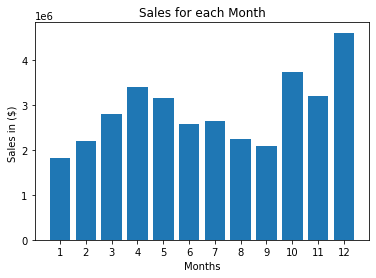

-----------------------------------------
We found The best sales at 2019 was at December


In [171]:
plt.bar(range(1,13),q1['sales'])
plt.title("Sales for each Month")
plt.xticks(range(1,13))
plt.xlabel("Months")
plt.ylabel("Sales in ($) ")
plt.show()
print("-----------------------------------------")
print("We found The best sales at 2019 was at December")

#### What city had the highest number of sales?

In [172]:
#Adding city column for the data
sales_2019['City']=sales_2019['Purchase Address'].str.split(',',2,expand=True)[1]+sales_2019['Purchase Address'].str.split(',',2,expand=True)[2].str.split(' ',2,expand=True)[1]

In [173]:
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,DallasTX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,BostonMA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los AngelesCA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los AngelesCA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los AngelesCA


In [174]:
q2=sales_2019.groupby('City').sum()
print(q2)

                  Quantity Ordered    Price Each         sales
City                                                          
 AtlantaGA                   16584  2.778609e+06  2.794199e+06
 AustinTX                    11137  1.808340e+06  1.818044e+06
 BostonMA                    22494  3.634398e+06  3.658628e+06
 DallasTX                    16707  2.750026e+06  2.765374e+06
 Los AngelesCA               33247  5.417172e+06  5.448304e+06
 New York CityNY             27903  4.632921e+06  4.661867e+06
 PortlandME                   2746  4.467524e+05  4.493214e+05
 PortlandOR                  11291  1.859836e+06  1.870011e+06
 San FranciscoCA             50169  8.204001e+06  8.254744e+06
 SeattleWA                   16534  2.730587e+06  2.745046e+06


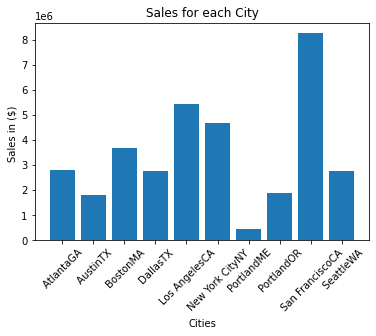

-----------------------------------------
We found The best sales at 2019 was at San Francisco


In [175]:
plt.bar(q2.index,q2['sales'])
plt.title("Sales for each City")
plt.xticks(rotation=45)
plt.xlabel("Cities")
plt.ylabel("Sales in ($) ")
plt.show()
print("-----------------------------------------")
print("We found The best sales at 2019 was at San Francisco")

#### What time should we display advertisment to maximize likelihood of customer's buying product?

In [176]:
sales_2019['Purshasing_Hour']=sales_2019['Order Date'].str.split(" ",1,expand=True)[1].str.split(":",1,expand=True)[0]

In [177]:
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Purshasing_Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,DallasTX,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,BostonMA,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los AngelesCA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los AngelesCA,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los AngelesCA,09


In [178]:
q3=sales_2019['Purshasing_Hour'].value_counts().to_frame()
q3.head()

,Purshasing_Hour
19,12886
12,12573
11,12392
18,12263
20,12218


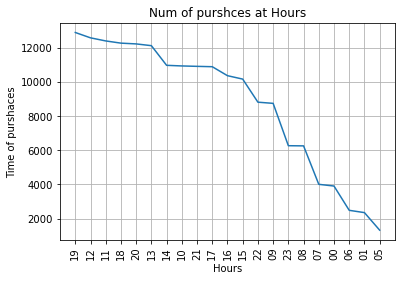

----------------------------------------
The best time to dispaly the advertisment is at 7 PM


In [179]:
plt.plot(q3.index[0:21],q3['Purshasing_Hour'][0:21])
plt.xticks(rotation=90)
plt.xlabel("Hours")
plt.ylabel("Time of purshaces")
plt.title("Num of purshces at Hours")
plt.grid()
plt.show()
print("----------------------------------------")
print("The best time to dispaly the advertisment is at 7 PM")

#### What is the sold products?

In [191]:
q4=sales_2019.groupby('Product').sum()
q4.head(10)

,Quantity Ordered,Price Each,sales
Product,,,
20in Monitor,4126,450739.02,453818.74
27in 4K Gaming Monitor,6239,2427687.75,2433147.61
27in FHD Monitor,7541,1124625.02,1131074.59
34in Ultrawide Monitor,6192,2346058.26,2352898.08
AA Batteries (4-pack),27615,78942.72,106041.60
AAA Batteries (4-pack),30986,61629.88,92648.14
Apple Airpods Headphones,15637,2328750.00,2345550.00
Bose SoundSport Headphones,13430,1329667.02,1342865.70
Flatscreen TV,4813,1438200.00,1443900.00


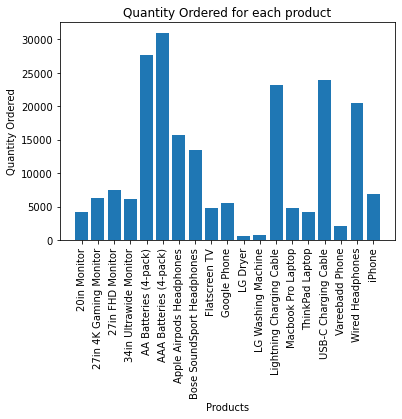

-------------------------------------
We found AAA Batteries (4-pack) is the most ordered product


In [197]:
plt.bar(q4.index,q4['Quantity Ordered'])
plt.xticks(rotation=90)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.title("Quantity Ordered for each product")
plt.show()
print("-------------------------------------")
print("We found AAA Batteries (4-pack) is the most ordered product")